# Определение перспективного тарифа для телеком компании

Клиентам оператора сотовой связи «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

pd.options.display.float_format = '{:.2f}'.format

df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

for df in (df_users, df_calls, df_messages, df_internet):
    df.info()
    display(df.sample(10, random_state=1))
    print(df.duplicated().sum())

df_tariffs.info() 
display(df_tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
304,1304,68,NaN,Владимир,Илья,Соловьёв,2018-11-05,ultra
340,1340,50,NaN,Пенза,Тимофей,Алютин,2018-01-30,smart
47,1047,67,NaN,Саратов,Милица,Меркулова,2018-10-29,smart
67,1067,45,NaN,Москва,Юзефа,Абашкина,2018-04-09,smart
479,1479,40,NaN,Хабаровск,Игорь,Богданов,2018-07-03,smart
485,1485,34,NaN,Киров,Таисия,Сухова,2018-12-29,ultra
310,1310,28,NaN,Уфа,Рудольф,Нестеров,2018-03-22,ultra
31,1031,66,NaN,Москва,Лаврентий,Тимофеев,2018-11-02,smart
249,1249,25,NaN,Курск,Изольда,Авдушева,2018-08-14,smart
90,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
26953,1066_374,2018-08-26,0.00,1066
66122,1168_1273,2018-03-28,16.05,1168
67325,1171_350,2018-09-14,6.23,1171
74643,1186_465,2018-09-02,0.79,1186
192311,1472_124,2018-05-04,5.94,1472
47375,1118_664,2018-10-24,13.41,1118
91143,1227_563,2018-08-03,15.15,1227
3818,1010_67,2018-08-16,14.29,1010
182822,1454_574,2018-09-23,9.98,1454
187346,1463_0,2018-12-05,10.63,1463


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
45696,1197_26,2018-12-31,1197
66091,1282_523,2018-11-30,1282
18743,1082_184,2018-10-18,1082
33759,1146_557,2018-12-22,1146
11403,1048_49,2018-09-27,1048
97793,1401_125,2018-08-10,1401
406,1000_406,2018-12-29,1000
71393,1302_221,2018-10-23,1302
103004,1420_11,2018-12-12,1420
53795,1238_208,2018-10-08,1238


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
35745,35745,1124_125,122.45,2018-12-03,1124
18383,18383,1064_102,320.60,2018-12-19,1064
59774,59774,1203_22,605.96,2018-06-17,1203
56317,56317,1188_123,781.73,2018-05-08,1188
52231,52231,1176_386,150.98,2018-08-20,1176
20276,20276,1068_26,389.65,2018-12-04,1068
82748,82748,1281_64,841.89,2018-11-07,1281
129266,129266,1431_300,461.23,2018-11-26,1431
46783,46783,1160_75,0.00,2018-08-15,1160
48492,48492,1168_260,336.06,2018-07-28,1168


0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод

У нас есть 5 таблиц, дубликатов нет, пропусков немного, только в таблице users - churn_date (дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)), т.е. NaN там, где пользователи не отказывались от тарифа.

Есть 1 таблица с данными о 500 пользователях, 3 таблицы по звонкам, сообщениям и интернету, общее у которых - user_id. Последняя таблица - со сводной информацией о двух тарифах. В таблице по интернету есть лишняя колонка, повторяющая индекс "Unnamed: 0".

## Предобработка данных

### работа с таблицей по пользователям и тарифам

In [2]:
df_tariffs=df_tariffs.rename(columns={"tariff_name": "tariff"}) 
# поменяем название столбца в таблице с информацием по тарифам, 
# чтобы выполнить соединение с таблицей по пользователем на основании тарифа
df_users_tariff=df_users.merge(df_tariffs, on='tariff')
#display(df_users_tariff.sample(5, random_state=1))
df_users_tariff['churn_date'] = df_users_tariff['churn_date'].fillna('2018-12-31')
df_users_tariff['churn_date']=pd.to_datetime(df_users_tariff['churn_date'], format='%Y-%m-%d')
df_users_tariff['reg_date']=pd.to_datetime(df_users_tariff['reg_date'], format='%Y-%m-%d')
# преобразование формата в дату

In [3]:
df_users_tariff.loc[df_users_tariff['tariff'] == 'smart', 'tariff'] = 0
df_users_tariff.loc[df_users_tariff['tariff'] == 'ultra', 'tariff'] = 1

In [4]:
df_users_tariff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,1,1000,30720,3000,1950,150,1,1
1,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,1,1000,30720,3000,1950,150,1,1
2,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,1,1000,30720,3000,1950,150,1,1
3,1013,36,2018-12-31,Иваново,Борис,Андреенко,2018-11-14,1,1000,30720,3000,1950,150,1,1
4,1016,58,2018-12-31,Омск,Марица,Сазонова,2018-11-21,1,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1494,62,2018-12-31,Омск,Ренат,Андропов,2018-08-17,0,50,15360,500,550,200,3,3
496,1496,36,2018-12-31,Вологда,Трифон,Блохин,2018-01-27,0,50,15360,500,550,200,3,3
497,1497,32,2018-12-31,Челябинск,Каролина,Агеева,2018-10-09,0,50,15360,500,550,200,3,3
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,0,50,15360,500,550,200,3,3


### работа с таблицей по звонкам

In [5]:
# работа с таблицей по звонкам
df_calls['duration']=np.ceil(df_calls['duration']) # округлим в большую сторону время в минутах
df_calls['duration']=df_calls['duration'].astype('int') # поменяем тип данных о времени в минутах на целочисленный
df_calls['call_date']=pd.to_datetime(df_calls['call_date'], format='%Y-%m-%dT%H:%M:%S') # преобразование формата в дату
df_calls['call_date_month'] = df_calls['call_date'].dt.month # создание столбца с месяцами
df_calls = df_calls.drop(columns=['id']) # удалим столбец с id звонка, он состоит из id_ и порядкового номера звонка, 
# новой информации не несет и занимает место как тип данных object

In [6]:
zero_calls=df_calls.loc[df_calls['duration']==0,'duration'].count()/df_calls['duration'].count()
print('the persentage of calls with zero duration is: {:.2%}'.format(zero_calls))

the persentage of calls with zero duration is: 19.55%


In [7]:
df_calls = df_calls[df_calls.duration !=0]

Почти 20% звонков в данных имеют длительность ноль, скорее всего это пропущенные звонки. За них пользователь не платил. Заменять эти нули было бы некорректно, поэтому мы удалили их из таблицы по звонкам.

### работа с таблицей по интернет-трафику

In [8]:
df_internet['mb_used']=np.ceil(df_internet['mb_used']) # округлим в большую сторону mb
df_internet['mb_used']=df_internet['mb_used'].astype('int') # поменяем тип данных на целочисленный
df_internet['session_date']=pd.to_datetime(df_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
df_internet['session_date_month']=df_internet['session_date'].dt.month
df_internet = df_internet.drop(columns=['id', 'Unnamed: 0']) 
# удалим столбец с id звонка (по аналогии с предыдущей таблицей) 
# и удалим столбец "Unnamed: 0", который похож на ошибочно созданный второй индекс

In [9]:
zero_internet=df_internet.loc[df_internet['mb_used']==0,'mb_used'].count()/df_internet['mb_used'].count()
print('the persentage of connections with zero mb: {:.2%}'.format(zero_internet))

the persentage of connections with zero mb: 13.12%


In [10]:
df_calls = df_calls[df_calls.duration !=0]

13.12% интернет-соединений были ноль Мб. За них пользователь не платил. Заменять эти нули было бы некорректно, поэтому мы удалили их из таблицы.

### работа с таблицей по сообщениям

In [11]:
df_messages['messages']=1 # создадим столбец, с количествами сообщений для будущих расчетов, одна строка - одно сообщение
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
df_messages['message_date_month']=df_messages['message_date'].dt.month

df_messages = df_messages.drop(columns=['id']) 
# удалим столбец с id (по аналогии с предыдущими таблицей) 

## Расчёты

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам:

In [12]:
df_calls_grouped = df_calls.groupby(['user_id','call_date_month'])['duration'].agg(['count','sum'])
#same df_calls.pivot_table(index=['user_id', 'call_date_month'], values='duration', aggfunc=('sum', 'count'))
df_calls_grouped=df_calls_grouped.reset_index()
df_calls_grouped=df_calls_grouped.rename(columns={"count": "calls_count_total", "sum": "calls_minutes_total", "call_date_month":"month"})
df_calls_grouped

,user_id,month,calls_count_total,calls_minutes_total
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466
...,...,...,...,...
3163,1498,10,30,247
3164,1499,9,8,70
3165,1499,10,44,449
3166,1499,11,62,612


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам

In [13]:
df_messages_grouped = df_messages.groupby(['user_id','message_date_month'])['messages'].agg(['sum'])
df_messages_grouped=df_messages_grouped.reset_index()
df_messages_grouped=df_messages_grouped.rename(columns={"sum": "messages_total", "message_date_month":"month"})
df_messages_grouped

,user_id,month,messages_total
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам:

In [14]:
df_internet_grouped = df_internet.groupby(['user_id','session_date_month'])['mb_used'].agg(['sum'])
df_internet_grouped=df_internet_grouped.reset_index()
df_internet_grouped=df_internet_grouped.rename(columns={"sum": "internet_total", "session_date_month":"month"})
df_internet_grouped

,user_id,month,internet_total
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
...,...,...,...
3198,1498,10,20604
3199,1499,9,1848
3200,1499,10,17809
3201,1499,11,17984


Посчитаем помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану). 
Для этого нам нужно собрать информацию в одной таблице с пользователями по месяцам. 

In [15]:
new_df_calls_internet=pd.merge(df_internet_grouped, df_calls_grouped, on=['user_id', 'month'],how='outer')
new_df_calls_internet
df_all = pd.merge(new_df_calls_internet, df_messages_grouped, on=['user_id', 'month'],how='outer')
df_all.info() # проверим, включили ли мы все данные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
user_id                3214 non-null int64
month                  3214 non-null int64
internet_total         3203 non-null float64
calls_count_total      3168 non-null float64
calls_minutes_total    3168 non-null float64
messages_total         2717 non-null float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [16]:
df_all = df_all.sort_values(by=['user_id'])
df_all

,user_id,month,internet_total,calls_count_total,calls_minutes_total,messages_total
0,1000,5,2256.00,17.00,159.00,22.00
1,1000,6,23257.00,28.00,172.00,60.00
2,1000,7,14016.00,41.00,340.00,75.00
3,1000,8,14070.00,42.00,408.00,81.00
4,1000,9,14581.00,46.00,466.00,57.00
...,...,...,...,...,...,...
3195,1498,7,7486.00,20.00,175.00,20.00
3200,1499,10,17809.00,44.00,449.00,48.00
3199,1499,9,1848.00,8.00,70.00,11.00
3201,1499,11,17984.00,62.00,612.00,59.00


In [17]:
pd.DataFrame(round((df_all.isna().mean()*100),3)).style.background_gradient('coolwarm')

,0
user_id,0
month,0
internet_total,0.342
calls_count_total,1.431
calls_minutes_total,1.431
messages_total,15.464


In [18]:
# поменяем NaN на значение ноль (там где нет значений, потрубление было 0 минут, 0 мегабайт или 0 сообщений)
df_all['internet_total'] = df_all['internet_total'].fillna(0) 
df_all['calls_minutes_total'] = df_all['calls_minutes_total'].fillna(0)
df_all['messages_total'] = df_all['messages_total'].fillna(0)

In [19]:
# преобразуем данные в целочисленные, создав фунцию
def convert_float_to_int(df,column):
    df[column]=df[column].astype('int')
convert_float_to_int(df_all,'internet_total')
convert_float_to_int(df_all,'calls_minutes_total')
convert_float_to_int(df_all,'messages_total')

In [20]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3202
Data columns (total 6 columns):
user_id                3214 non-null int64
month                  3214 non-null int64
internet_total         3214 non-null int64
calls_count_total      3168 non-null float64
calls_minutes_total    3214 non-null int64
messages_total         3214 non-null int64
dtypes: float64(1), int64(5)
memory usage: 175.8 KB


В нашей сводной таблице по звонкам, интернету и сообщениям, 3214 строк, максимум это 6000 (500пользователей на 12 месяцев). Это оъясняется тем, что не все пользователи пользовались тарифом в течение года, информация по ним есть не за все 12 месяцев. Теперь соединим ее с данными по пользователям и тарифам.

In [21]:
df = pd.merge(df_users_tariff, df_all,  how='right', on='user_id')
df=df.sort_values(by=['user_id','month'])
df
# df[df.user_id==1221] посмотрим на конкретного пользователся
# len(df['user_id'].unique()) #проверка, что мы не потеряли пользователей , их 500 

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,internet_total,calls_count_total,calls_minutes_total,messages_total
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,1,1000,30720,3000,1950,150,1,1,5,2256,17.00,159,22
1,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,1,1000,30720,3000,1950,150,1,1,6,23257,28.00,172,60
2,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,1,1000,30720,3000,1950,150,1,1,7,14016,41.00,340,75
3,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,1,1000,30720,3000,1950,150,1,1,8,14070,42.00,408,81
4,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,1,1000,30720,3000,1950,150,1,1,9,14581,46.00,466,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,0,50,15360,500,550,200,3,3,10,20604,30.00,247,42
3211,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,0,50,15360,500,550,200,3,3,9,1848,8.00,70,11
3210,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,0,50,15360,500,550,200,3,3,10,17809,44.00,449,48
3212,1499,35,2018-12-31,Пермь,Гектор,Корнилов,2018-09-27,0,50,15360,500,550,200,3,3,11,17984,62.00,612,59


In [22]:
# Мы видим, что в новой таблице, созданной методом присоединения 'outer' - у нас прибавилось 2 строчки. 
# Это значит, были 2 пользователя, по которым нет никаких данных по их пользованию звонками, интернетом или сообщениями. 
# Проверим:
#df.query('internet_total !=internet_total ')
#df=df.dropna(subset=['internet_total'])
# видим, что это 2 пользователя, зарегистрированные в декабре и отказавшиеся черзе 5 и 7 дней, их нужно удалить, 
#  либо не пользоваться методом присоединения 'outer', что и было сделано, и, поэтому, данные манипуляции закомментриованы

In [23]:
convert_float_to_int(df,'internet_total')
convert_float_to_int(df,'calls_minutes_total')
convert_float_to_int(df,'messages_total')
convert_float_to_int(df,'month')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 20 columns):
user_id                  3214 non-null int64
age                      3214 non-null int64
churn_date               3214 non-null datetime64[ns]
city                     3214 non-null object
first_name               3214 non-null object
last_name                3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null int64
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
month                    3214 non-null int64
internet_total           3214 non-null int64
calls_count_total        3168 non-null float64
calls_minutes_total      3214 non-null int64
messages_total 

In [25]:
# создадим функцию для подсчета помесячной выручки с каждого пользователя
def total_paid(row):
    
    rub_monthly_fee= row['rub_monthly_fee']
    
    calls_minutes_total = row['calls_minutes_total']
    minutes_included = row['minutes_included']
    rub_per_minute = row ['rub_per_minute']
        
    internet_total = row['internet_total']
    mb_per_month_included = row['mb_per_month_included']
    rub_per_gb = row['rub_per_gb'] 
    
    messages_total = row['messages_total']
    messages_included = row['messages_included']
    rub_per_message = row['rub_per_message']
    
    price = rub_monthly_fee
    if calls_minutes_total > minutes_included:
            price += ((calls_minutes_total)-minutes_included)*rub_per_minute
    if messages_total > messages_included:
            price += ((messages_total)-messages_included)*rub_per_message
    if internet_total > mb_per_month_included:
            price += ((internet_total)-mb_per_month_included)/1024*rub_per_gb
        
    return price

In [26]:
df['total_paid'] = df.apply(total_paid, axis=1)
display(df.sample(5, random_state=1))

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,month,internet_total,calls_count_total,calls_minutes_total,messages_total,total_paid
473,1272,61,2018-12-31,Пенза,Мстислав,Демьянов,2018-08-29,1,1000,30720,...,1950,150,1,1,10,15800,33.00,305,76,1950.00
905,1455,38,2018-12-31,Балашиха,Рубен,Авринский,2018-03-22,1,1000,30720,...,1950,150,1,1,11,14820,68.00,626,5,1950.00
2352,1299,37,2018-12-31,Уфа,Мариетта,Симонова,2018-01-27,0,50,15360,...,550,200,3,3,3,21668,67.00,714,38,2424.03
1102,1025,56,2018-12-31,Уфа,Матвей,Акинин,2018-03-15,0,50,15360,...,550,200,3,3,3,7341,37.00,323,14,550.00
1176,1040,23,2018-12-31,Сочи,Юрий,Одинцов,2018-06-08,0,50,15360,...,550,200,3,3,11,19899,48.00,437,0,1436.52


### Анализ данных

Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [27]:
# найдем нужные метрики с помощью pivot_table
df_total_by_tariff=df.pivot_table(index=['tariff'], values=(
    'calls_minutes_total', 'internet_total', 'messages_total', 'total_paid'), aggfunc=('median','mean','var','std'))
df_total_by_tariff

calls_minutes_total                         internet_total           \
                      mean median    std       var           mean   median   
tariff                                                                       
0                   417.93 422.00 190.31  36219.32       16229.19 16531.00   
1                   526.62 518.00 317.61 100873.63       19486.90 19324.00   

                             messages_total                      total_paid  \
            std          var           mean median   std     var       mean   
tariff                                                                        
0       5877.58  34545911.13          33.38  28.00 28.23  796.81    1233.35   
1      10096.32 101935621.05          49.36  38.00 47.80 2285.27    2060.53   

                                 
        median    std       var  
tariff                           
0       959.90 787.69 620452.61  
1      1950.00 356.31 126953.29

In [28]:
# также их можно рассчитать без таблицы
total_paid_mean_smart = np.mean(df[df['tariff']==0]['total_paid'])
total_paid_std_smart = np.std(df[df['tariff']==0]['total_paid'])
print(f'Mean of total_paid for smart is {total_paid_mean_smart:.0f}, standard deviation is {total_paid_std_smart:.0f}')

total_paid_mean_ultra = np.mean(df[df['tariff']==1]['total_paid'])
total_paid_std_ultra = np.std(df[df['tariff']==1]['total_paid'])
print(f'Mean of total_paid for ultra is {total_paid_mean_ultra:.0f}, standard deviation is {total_paid_std_ultra:.0f}')


Mean of total_paid for smart is 1233, standard deviation is 788
Mean of total_paid for ultra is 2061, standard deviation is 356


In [29]:
df['tariff'].value_counts()

0    2229
1     985
Name: tariff, dtype: int64

In [30]:
df_total_by_tariff_short=df.pivot_table(index=['tariff'], values=(
    'calls_minutes_total', 'internet_total', 'messages_total', 'total_paid'), aggfunc=('mean'))

df_total_by_tariff_short['tariff_name']=['smart', 'ultra']
df_total_vs_included=pd.merge(df_total_by_tariff_short, df_tariffs, left_on='tariff_name', right_on='tariff')
df_total_vs_included=df_total_vs_included.drop(columns=['rub_per_gb','rub_per_message', 'rub_per_minute', 'tariff_name' ])
columnsTitles = ['tariff','calls_minutes_total', 'minutes_included', 'internet_total', 'mb_per_month_included','messages_total', 'messages_included', 'total_paid', 'rub_monthly_fee' ]
df_total_vs_included = df_total_vs_included.reindex(columns=columnsTitles)
df_total_vs_included

,tariff,calls_minutes_total,minutes_included,internet_total,mb_per_month_included,messages_total,messages_included,total_paid,rub_monthly_fee
0,smart,417.93,500,16229.19,15360,33.38,50,1233.35,550
1,ultra,526.62,3000,19486.90,30720,49.36,1000,2060.53,1950


calls_minutes_total : smart and ultra


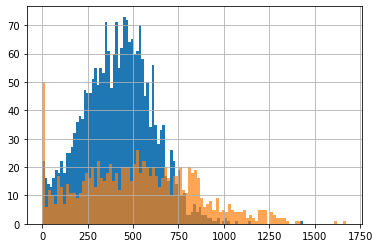

smart


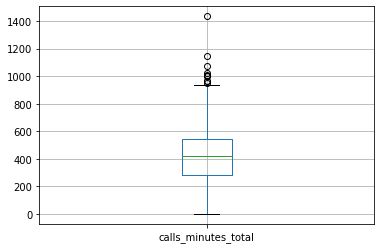

ultra


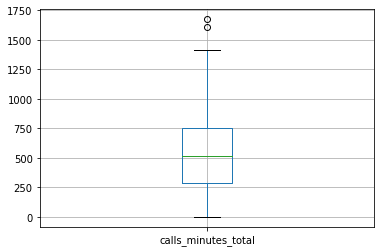

internet_total : smart and ultra


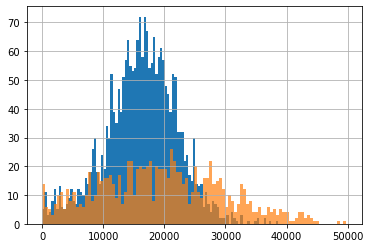

smart


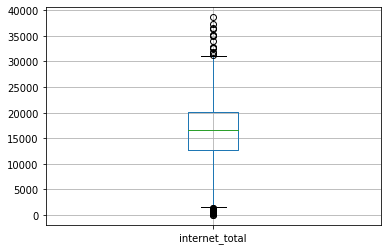

ultra


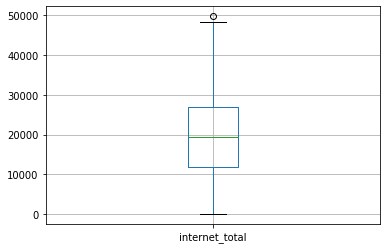

messages_total : smart and ultra


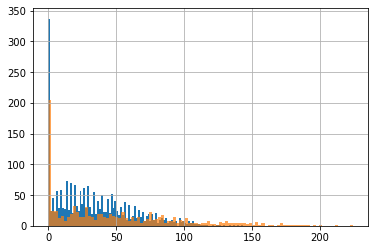

smart


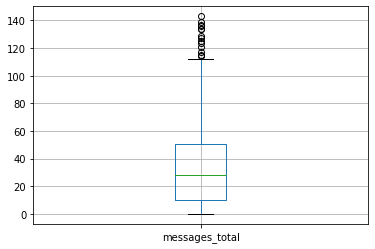

ultra


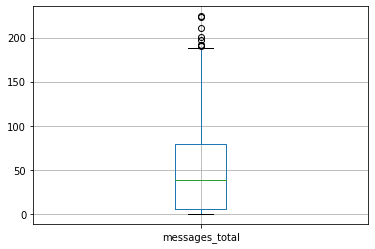

total_paid : smart and ultra


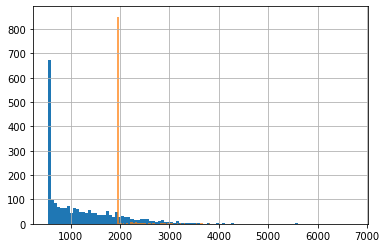

smart


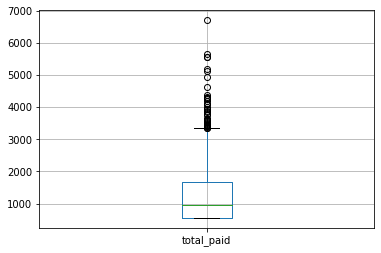

ultra


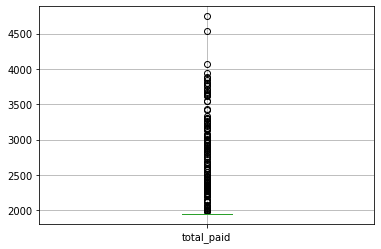

In [31]:
for parametr in ['calls_minutes_total','internet_total','messages_total', 'total_paid']:
    print(parametr, ": smart and ultra")
    df[df['tariff']==0][parametr].hist(bins=100)
    df[df['tariff']==1][parametr].hist(bins=100, alpha = 0.70)
    plt.show()
    print("smart")
    df[df['tariff']==0].boxplot(column=[parametr])
    plt.show()
    print("ultra")
    df[df['tariff']==1].boxplot(column=[parametr])
    plt.show()

In [32]:
df.query('total_paid > 550 and tariff==0')['total_paid'].count()/df.query('tariff==0')['total_paid'].count()

0.746971736204576

In [33]:
df.query('total_paid > 1950 and tariff==1')['total_paid'].count()/df.query('tariff==1')['total_paid'].count()

0.13604060913705585

In [34]:
df.query('total_paid > 1950 and tariff==0')['total_paid'].count()/df.query('tariff==0')['total_paid'].count()

0.1727231942575146

Заметим, что по тарифу smart у нас 2229 наблюдений, а по ultra 985. Каждое наблюдение - это данные за месяц пользования тарифом по одному пользователю.

Из таблицы со средним, медианой, дисперсией и стандартным отклонением по тарифам по нашим наблюдениям, мы можем сделать следующие выводы.
В среднем, пользователям тарифа smart требуется меньше минут в месяц, чем пользователям ultra: 418 и 527 минут, при этом стандартной отклонение по ultra гораздо больше (190 и 318). Похоже обстоят дела с использованием интернета: пользователям smart нужно 16229 Мб, а тем, кто использует ultra - 19487 Мб , стандартные отклонения 5878 и 10096 соответственно. Что касается сообщений, с среднем smart отправляют 33 сообщения, а ultra - 49, стандартные отклонения 28 и 48 соответственно. 
Заметим, что средние и медианы по звонкам и объему интернета в обоих группах довольно близки внутри каждой группы.

Если мы посмотрим графики, то заметим, что по использованным минутам звонков, объему интернета и количеству сообщений среди наблюдений по smart очень много выбросов. Видно, что по всем использованию минут, интернета и сообщений оба датасета скошены вправо, но в случае тарифа ultra - скос вправо более ярко выражен (анализ среднего и медианы дал нам те же выводы).

Средняя оплата за месяц по smart составила 1233 рублей (а медиана 960 рублей) со стандартным отклонением в 787 рублей. В 75% случаев абоненты smart заплатили больше стоимости своего тарифа в 550 рублей. А в 17% они заплатили даже больше стоимости  тарифа ultra. По ultra средняя оплата составила 2060 рублей со стандартным отклонением 356 рублей. Медиана по ultra -  1950 рублей, это сумма является абоненской платой тарифа, значит как минимум половина пользователей не доплачивала ничего сверх тарифа). Если говорить точно, то только в 13% случаев абоненты ultra заплатили сверх тарифа. Заметим, что среди абонентов smart больше тех, кто "переплачивает" за месяц и даже мог бы "покрыть" этими деньгами более дорогой тариф. 

Обратим внимание на графики по оплате - по ним очень хорошо видно вышесказанное - в большинстве абоненты ultra платят в месяц сумму равную абоненской плате, все остальное - это выбросы. В случае тарифа smart видно, что датасет по оплате smart скошен вправо. Это видно также и по диаграмме размаха: расстояние между первым квартилем и медианой заметно меньше, чем расстояние между медианой и третьим квартилем. В случае оплаты ultra мы видим медиану и выбросы, находящиеся за третьм квартилем.



## Проверка гипотез

Шаг 4. Проверьте гипотезы
средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

4.1 Cредняя выручка пользователей тарифов «Ультра» и «Смарт». 
Если мы хотим узнать, различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»  - нам нужно проверить гипотезу о равенстве среднего двух генеральных совокупностей пользователей двух тарифов, по взятым из них выборкам, данные о которых у нас есть. 
Нулевая гипотеза должна утверждать, что между между средними выручками пользователей тарифов «Ультра» и «Смарт» разницы нет. 

In [35]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df[df['tariff']==0]['total_paid'], df[df['tariff']==1]['total_paid'])

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.172655564462924e-190
Отвергаем нулевую гипотезу


Мы отвергаем нулевую гипотезу о равенстве средних. Полученное значение p-value (это очень маленькое число, близкое к нулю) говорит, что различие средних выручек - неслучайно. Таким образом, мы можем утверждать о значимом различии между средними выручками пользователей тарифов «Ультра» и «Смарт».

4.2 средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Здесь нам также нужно проверить гипотезу о равенстве среднего двух генеральных совокупностей пользователей Москвы и других городов, по выборкам, которые у нас есть. Нулевая гипотеза должна утверждать, что между между средними выручками пользователей Москвы и других городов разницы нет. Альтернативная - что средние выручки по Москве и другим городам - разные.

In [36]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(df[df['city']=='Москва']['total_paid'], df[df['city']!='Москва']['total_paid'])

print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.47443187631524797
Не получилось отвергнуть нулевую гипотезу


p-значение намного больше alpha, поэтому мы не можем отвергнуть нулевую гипотезу и на основании имеющихся данных утверждать, что средние выручки Москвы и других городов отличаются.

## Общий вывод

Средняя вырочка по выборке «Смарт» составляет 1233 рублей со стандартным отклонением в 787 рублей, в то время как по ultra он равна 2060 рублей со стандартным отклонением 356 рублей.

Мы смогли отвергнуть гипотезу о равенстве средних выручек пользователей "Смарта" и "Ультры", это значит, что средняя выручка по всем пользователям с тарифом «Ультра» приносит компании больше дохода, чем средняя выручка от всех пользователей тарифа «Смарт». Также средняя выручка по "Ультре" представляется более стабильной т.к. стандартое отклонение по ней гораздо меньше, чем по "Смарту". 

В то же время, основываясь на наших данных мы не можем утвержать, что в целом есть разница между выручкой в зависимости от города пользователей.  с вероятностью в почти 50% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками и Москве и другим городам.

<div style="border:solid lightblue 3px; padding: 20px">
<b>Общий комментарий ревьюера:</b>

Проект получился объемным, информативным, работа принята. Удачи на следующих спринтах 😊
</div>